## Affichage de profils d’expression d’un gène au choix dans le dataset GTEX-NCBI:

Pour réaliser cette partie, nous allons utiliser le fichier précalculé « Average_expression_in_normal_tissues.csv » qui contient les valeurs moyennes d’expression pour chaque paire [gène, tissu].


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importation du datatset Average_expression_in_normal_tissues 

expression_data = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/Average_expression_in_normal_tissues.csv", sep=";")

In [3]:
expression_data.head()

,id_gene,gene_symbol,colon,uterus,female_genital,connective_tissues,rectum_anus,muscles,tonsil,embryonic_stem_cells,...,hematopoietic,neuro,male_germinal,cardio_vascular,tracheo_broncho_lung,urinary_kidney,endocrine_gland,male_genital,hepato_bilary,head_neck
0,1,A1BG,0.921439,1.964743,1.719488,1.177337,0.141552,0.350299,0.375989,0.589084,...,1.242904,1.792367,0.791208,1.486970,1.419016,0.785731,1.504148,1.531059,7.667611,0.939431
1,503538,A1BG-AS1,0.462968,0.979163,0.746795,0.428260,0.300275,0.103680,0.749721,0.307138,...,0.606642,0.694821,0.222968,0.629767,0.852581,0.472374,0.745205,0.756612,1.600621,0.453119
2,29974,A1CF,1.454283,0.008365,0.007729,0.011699,2.511052,0.016319,0.000000,0.012868,...,0.032135,0.005552,0.020338,0.007852,0.009616,0.872221,0.010908,0.011020,3.807548,0.006554
3,2,A2M,6.315057,7.177928,6.737944,7.743671,7.394189,4.875162,5.058426,0.391450,...,0.978315,5.405587,4.524429,8.607759,9.911310,7.455689,6.566293,7.019779,7.869986,5.473478
4,144571,A2M-AS1,1.178651,1.910047,1.503675,1.318282,0.817139,0.486709,0.527712,0.234122,...,0.123232,1.100021,1.201406,1.451529,1.697580,1.664022,1.185032,1.597692,1.644354,0.759176


In [4]:
# une fonction pour tracer un digramme en barre pour des niveaux d'expression d'un gène donné

def plot_gene_expression(df, gene):
    
    '''
    df: dataset qui contient les valeurs moyennes d’expression pour chaque paire [gène, tissu]
    gene : le gène en question(un gène parmi les gènes dans le dataset)

    '''
    
    # test de la présence du gene dans le dataset
    if gene not in df['gene_symbol'].values:
        print(f"Gene {gene} non trouvé dans le dataset.")
    
    # Sélection de la ligne qui correspond au gène dans le dataset
    gene_data = df[df['gene_symbol'] == gene].drop('gene_symbol', axis=1)
    
    # tissues normaux sélectionnés pour le traçage du graphe
    selected_tissues = ['adrenal_gland', 'adult_ovary', 'artery', 'bladder', 'blood', 'bone_marrow', 'brain', 'breast', 
                        'bronchus_lung', 'central_nervous_system', 'colon', 'connective_tissues', 'div_digestive', 
                        'embryonic_stem_cells', 'esophagus', 'female_genital', 'fibroblast', 'gallbladder', 'haematopoietic_div',
                        'heart', 'kidney', 'liver', 'lymph_nodes', 'mouth', 'muscles', 'pancreas', 'pituitary_gland', 'placenta',
                        'prostate', 'rectum_anus', 'skin', 'small_intestine', 'spleen', 'stomach', 'testis', 'thymus', 
                        'thyroid_gland', 'tonsil', 'trachea_upper_respiratory', 'uterus', 'vagina']  
    
    gene_data=gene_data[selected_tissues]
    
    # Transposer la ligne pour un traçage plus facile
    gene_data = gene_data.T
    gene_data.columns = ['Expression level'] # renommage de la colonne

    tissues = gene_data.index # les différents tissues
    
    # couleurs au niveau du graphe
    colors = ['blue' if tissu == 'liver' else 'red' if value > 1 else 'grey' for tissu, value in zip(tissues, gene_data.values)]
    
    #gene_data = gene_data.reset_index()
    
    # Tracé du graphe
    plt.figure(figsize=(10, 4))
    plt.bar(gene_data.index, gene_data['Expression level'].values, color=colors)
    plt.title(gene)
    plt.ylabel('Expression level')
    
    # barplot with seaborn 
    #sns.barplot(x='index',y="Expression level",data=gene_data)
    plt.xticks(rotation=80)
    
    plt.show()
    
    #return gene_data

In [29]:
# une fonction pour tracer un digramme en barre pour des niveaux d'expression d'un gène donné

def plot_gene_expression(df, gene):
    
    '''
    df: dataset qui contient les valeurs moyennes d’expression pour chaque paire [gène, tissu]
    gene : le gène en question(un gène parmi les gènes dans le dataset)

    '''
    
    # test de la présence du gene dans le dataset
    if gene not in df['gene_symbol'].values:
        print(f"Gene {gene} non trouvé dans le dataset.")
    
    # Sélection de la ligne qui correspond au gène dans le dataset
    gene_data = df[df['gene_symbol'] == gene].drop('gene_symbol', axis=1)
    
    # tissues normaux sélectionnés pour le traçage du graphe
    selected_tissues = ['adrenal_gland', 'adult_ovary', 'artery', 'bladder', 'blood', 'bone_marrow', 'brain', 'breast', 
                        'bronchus_lung', 'central_nervous_system', 'colon', 'connective_tissues', 'div_digestive', 
                        'embryonic_stem_cells', 'esophagus', 'female_genital', 'fibroblast', 'gallbladder', 'haematopoietic_div',
                        'heart', 'kidney', 'liver', 'lymph_nodes', 'mouth', 'muscles', 'pancreas', 'pituitary_gland', 'placenta',
                        'prostate', 'rectum_anus', 'skin', 'small_intestine', 'spleen', 'stomach', 'testis', 'thymus', 
                        'thyroid_gland', 'tonsil', 'trachea_upper_respiratory', 'uterus', 'vagina']  
    
    gene_data=gene_data[selected_tissues]
    
    # Transposer la ligne pour un traçage plus facile
    gene_data = gene_data.T
    gene_data.columns = ['Expression level'] # renommage de la colonne
    
    tissues = gene_data.index # les différents tissues
    
    # couleurs au niveau du graphe
    colors = ['blue' if gene == 'liver' else 'red' if value > 1 else 'grey' for gene, value in zip(tissues, gene_data.values)]
    
    # Tracé du graphe
    plt.figure(figsize=(15, 4))
    plt.bar(gene_data.index, gene_data['Expression level'], color=colors)
    
    plt.xticks(rotation=80)
   # plt.xticks(np.arange(len(selected_tissues)), selected_tissues,rotation=80) 
    plt.title(gene)
    plt.ylabel('Expression level')

In [49]:
import seaborn as sns

# une fonction pour tracer un digramme en barre pour des niveaux d'expression d'un gène donné

def plot_gene_expression(df, gene):
    
    '''
    df: dataset qui contient les valeurs moyennes d’expression pour chaque paire [gène, tissu]
    gene : le gène en question(un gène parmi les gènes dans le dataset)

    '''
    
    # test de la présence du gene dans le dataset
    if gene not in df['gene_symbol'].values:
        print(f"Gene {gene} non trouvé dans le dataset.")
    
    # Sélection de la ligne qui correspond au gène dans le dataset
    gene_data = df[df['gene_symbol'] == gene].drop('gene_symbol', axis=1)
    
    # tissues normaux sélectionnés pour le traçage du graphe
    selected_tissues = ['adrenal_gland', 'adult_ovary', 'artery', 'bladder', 'blood', 'bone_marrow', 'brain', 'breast', 
                        'bronchus_lung', 'central_nervous_system', 'colon', 'connective_tissues', 'div_digestive', 
                        'embryonic_stem_cells', 'esophagus', 'female_genital', 'fibroblast', 'gallbladder', 'haematopoietic_div',
                        'heart', 'kidney', 'liver', 'lymph_nodes', 'mouth', 'muscles', 'pancreas', 'pituitary_gland', 'placenta',
                        'prostate', 'rectum_anus', 'skin', 'small_intestine', 'spleen', 'stomach', 'testis', 'thymus', 
                        'thyroid_gland', 'tonsil', 'trachea_upper_respiratory', 'uterus', 'vagina']  
    
    gene_data=gene_data[selected_tissues]
    
    data = {
    'Tissue': ['adrenal_gland', 'adult_ovary', 'artery', 'bladder', 'blood', 'bone_marrow', 'brain', 'breast', 
                        'bronchus_lung', 'central_nervous_system', 'colon', 'connective_tissues', 'div_digestive', 
                        'embryonic_stem_cells', 'esophagus', 'female_genital', 'fibroblast', 'gallbladder', 'haematopoietic_div',
                        'heart', 'kidney', 'liver', 'lymph_nodes', 'mouth', 'muscles', 'pancreas', 'pituitary_gland', 'placenta',
                        'prostate', 'rectum_anus', 'skin', 'small_intestine', 'spleen', 'stomach', 'testis', 'thymus', 
                        'thyroid_gland', 'tonsil', 'trachea_upper_respiratory', 'uterus', 'vagina'],
    'Expression_level': gene_data[selected_tissues].values[0] }

     # Créer un DataFrame
    df = pd.DataFrame(data)

     # couleurs au niveau du graphe
    colors = ['blue' if gene == 'liver' else 'red' if value > 1 else 'grey' for gene, value in zip(selected_tissues, gene_data[selected_tissues].values[0])]
    
    # Créer le graphique avec Seaborn
    plt.figure(figsize=(10, 4))
    sns.barplot(x='Tissue', y='Expression_level', data=df, palette=colors)

    # Ajouter les labels et les titres
    plt.xlabel('Tissue')
    plt.ylabel('Expression level')
    plt.title('BRDT')

    # Rotation des labels de l'axe x pour les rendre lisibles
    plt.xticks(rotation=45, ha='right')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

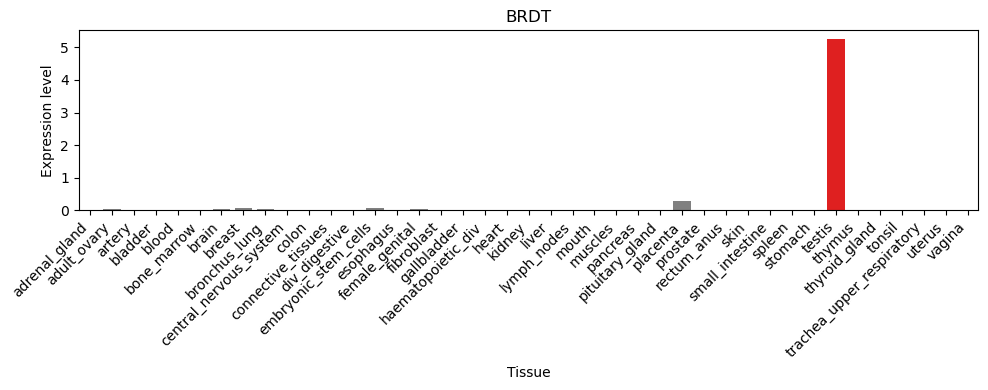

In [50]:
# Plotting for an example gene 'BRDT'

plot_gene_expression(expression_data, 'BRDT')

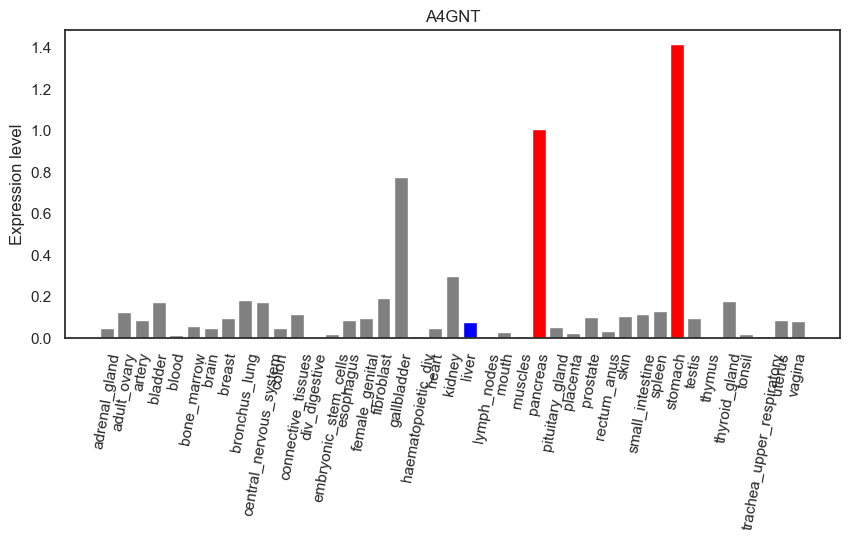

In [98]:
# Plotting for an example gene ''A4GNT'

plot_gene_expression(expression_data, 'A4GNT')

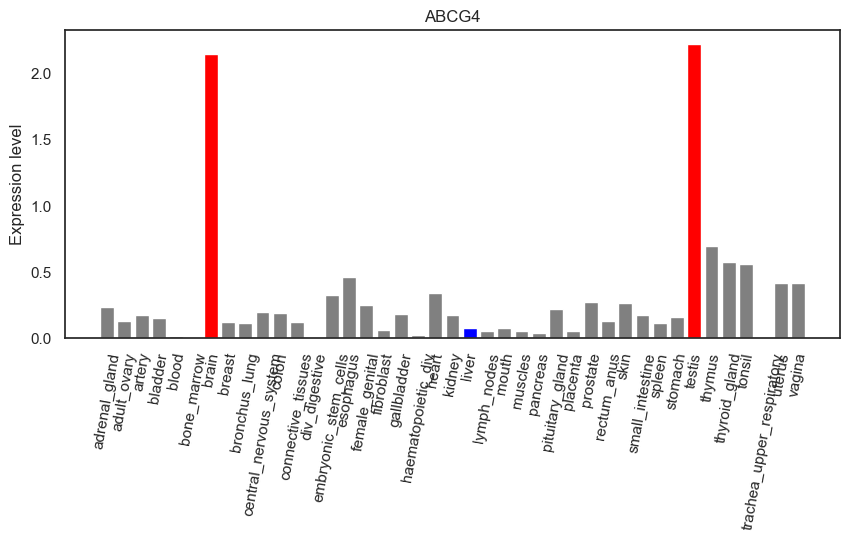

In [99]:
# Plotting for an example gene 'ABCG4'

plot_gene_expression(expression_data, 'ABCG4')